In [221]:
#importing the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [222]:
#reading the data set

uber = pd.read_csv("C:/Users/Shashwat/Desktop/PGDDS/Statistics-EDA/EDA/Uber Request Data.csv")
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [223]:
#checkng the variables

print(uber.shape,'\n\n')
print(uber.describe(include = 'all'),'\n\n')
print(uber.info())

(6745, 6) 


         Request id Pickup point    Driver id          Status  \
count   6745.000000         6745  4095.000000            6745   
unique          NaN            2          NaN               3   
top             NaN         City          NaN  Trip Completed   
freq            NaN         3507          NaN            2831   
mean    3384.644922          NaN   149.501343             NaN   
std     1955.099667          NaN    86.051994             NaN   
min        1.000000          NaN     1.000000             NaN   
25%     1691.000000          NaN    75.000000             NaN   
50%     3387.000000          NaN   149.000000             NaN   
75%     5080.000000          NaN   224.000000             NaN   
max     6766.000000          NaN   300.000000             NaN   

       Request timestamp  Drop timestamp  
count               6745            2831  
unique              5618            2598  
top       11/7/2016 8:37  12/7/2016 6:22  
freq                   6          

In [224]:
#converting 'Request timestamp' and 'Drop timestamp' to datetime format

uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'])

In [225]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [226]:
#checking the total null values in each column

uber.isnull().sum(axis = 0)

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [227]:
# Extracting date,time, hours and minutes from the 'Request timestamp' and creating new columns for each

uber['Request_date'] = uber['Request timestamp'].map(lambda x: x.date())
uber['Request_time'] = uber['Request timestamp'].map(lambda x: x.time())
uber['Request_hour'] = uber['Request timestamp'].map(lambda x: x.hour)
uber['Request_minute'] = uber['Request timestamp'].map(lambda x: x.minute)

In [228]:
# Extracting date,time, hours and minutes from the 'Drop timestamp' and creating new columns for each

uber['Drop_date'] = uber['Drop timestamp'].map(lambda x: x.date())
uber['Drop_time'] = uber.iloc[uber['Drop timestamp'].notna().index,5].dt.time
uber['Drop_hour'] = uber['Drop timestamp'].map(lambda x: x.hour)
uber['Drop_minute'] = uber['Drop timestamp'].map(lambda x: x.minute)

In [229]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 14 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request_date         6745 non-null object
Request_time         6745 non-null object
Request_hour         6745 non-null int64
Request_minute       6745 non-null int64
Drop_date            2831 non-null object
Drop_time            2831 non-null object
Drop_hour            2831 non-null float64
Drop_minute          2831 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(6)
memory usage: 737.8+ KB


In [230]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_time,Request_hour,Request_minute,Drop_date,Drop_time,Drop_hour,Drop_minute
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,51,2016-11-07,13:00:00,13.0,0.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,57,2016-11-07,18:47:00,18.0,47.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,17,2016-12-07,09:58:00,9.0,58.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,8,2016-12-07,22:03:00,22.0,3.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,33,2016-07-13,09:25:47,9.0,25.0


In [231]:
# Creating time buckets

uber.loc[(uber['Request_hour'] >= 3) & (uber['Request_hour'] < 6), 'Time_slot'] = 'Early morning' # Early morning: [3AM,6AM)
uber.loc[(uber['Request_hour'] >= 6) & (uber['Request_hour'] < 9), 'Time_slot'] = 'Morning' # Morning: [6AM,9AM)
uber.loc[(uber['Request_hour'] >= 9) & (uber['Request_hour'] < 12), 'Time_slot'] = 'Forenoon' # Forenoon: [9AM,12PM)
uber.loc[(uber['Request_hour'] >= 12) & (uber['Request_hour'] < 15), 'Time_slot'] = 'Afternoon' # Afternoon: [12PM,3PM)
uber.loc[(uber['Request_hour'] >= 15) & (uber['Request_hour'] < 18), 'Time_slot'] = 'Evening' # Evening: [3PM,6PM)
uber.loc[(uber['Request_hour'] >= 18) & (uber['Request_hour'] < 21), 'Time_slot'] = 'Late evening' # Late evening: [6PM,9PM)
uber.loc[(uber['Request_hour'] >= 21), 'Time_slot'] = 'Night' # Night: [11PM,12AM)
uber.loc[(uber['Request_hour'] >= 0) & (uber['Request_hour'] < 3), 'Time_slot'] = 'Late night' # Late night: [12AM,3AM)

In [232]:
# Total null values in each column

uber.isnull().sum(axis = 0)

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Request_date            0
Request_time            0
Request_hour            0
Request_minute          0
Drop_date            3914
Drop_time            3914
Drop_hour            3914
Drop_minute          3914
Time_slot               0
dtype: int64

In [233]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 15 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request_date         6745 non-null object
Request_time         6745 non-null object
Request_hour         6745 non-null int64
Request_minute       6745 non-null int64
Drop_date            2831 non-null object
Drop_time            2831 non-null object
Drop_hour            2831 non-null float64
Drop_minute          2831 non-null float64
Time_slot            6745 non-null object
dtypes: datetime64[ns](2), float64(3), int64(3), object(7)
memory usage: 790.5+ KB


In [234]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_time,Request_hour,Request_minute,Drop_date,Drop_time,Drop_hour,Drop_minute,Time_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,51,2016-11-07,13:00:00,13.0,0.0,Forenoon
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,57,2016-11-07,18:47:00,18.0,47.0,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,17,2016-12-07,09:58:00,9.0,58.0,Forenoon
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,8,2016-12-07,22:03:00,22.0,3.0,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,33,2016-07-13,09:25:47,9.0,25.0,Morning


In [235]:
# Creating a new column consisting of the next request time for a specific driver on the same date for all completed trips

uber['Next_request_timestamp'] = uber.loc[(uber['Status']=='Trip Completed')].groupby(['Driver id','Request_date'])['Request timestamp'].shift(-1)

In [236]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 16 columns):
Request id                6745 non-null int64
Pickup point              6745 non-null object
Driver id                 4095 non-null float64
Status                    6745 non-null object
Request timestamp         6745 non-null datetime64[ns]
Drop timestamp            2831 non-null datetime64[ns]
Request_date              6745 non-null object
Request_time              6745 non-null object
Request_hour              6745 non-null int64
Request_minute            6745 non-null int64
Drop_date                 2831 non-null object
Drop_time                 2831 non-null object
Drop_hour                 2831 non-null float64
Drop_minute               2831 non-null float64
Time_slot                 6745 non-null object
Next_request_timestamp    1470 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(3), object(7)
memory usage: 843.2+ KB


In [237]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_time,Request_hour,Request_minute,Drop_date,Drop_time,Drop_hour,Drop_minute,Time_slot,Next_request_timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,51,2016-11-07,13:00:00,13.0,0.0,Forenoon,2016-11-07 17:57:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,57,2016-11-07,18:47:00,18.0,47.0,Evening,NaT
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,17,2016-12-07,09:58:00,9.0,58.0,Forenoon,2016-12-07 21:08:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,8,2016-12-07,22:03:00,22.0,3.0,Night,NaT
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,33,2016-07-13,09:25:47,9.0,25.0,Morning,2016-07-13 21:57:28


In [238]:
# Total null values in each column

uber.isnull().sum(axis = 0)

Request id                   0
Pickup point                 0
Driver id                 2650
Status                       0
Request timestamp            0
Drop timestamp            3914
Request_date                 0
Request_time                 0
Request_hour                 0
Request_minute               0
Drop_date                 3914
Drop_time                 3914
Drop_hour                 3914
Drop_minute               3914
Time_slot                    0
Next_request_timestamp    5275
dtype: int64

In [239]:
# Creating a new timedelta column consisting the wait time of a driver after completing a trip for next request 

uber['Wait_time'] = uber['Next_request_timestamp'] - uber['Drop timestamp']

In [240]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 17 columns):
Request id                6745 non-null int64
Pickup point              6745 non-null object
Driver id                 4095 non-null float64
Status                    6745 non-null object
Request timestamp         6745 non-null datetime64[ns]
Drop timestamp            2831 non-null datetime64[ns]
Request_date              6745 non-null object
Request_time              6745 non-null object
Request_hour              6745 non-null int64
Request_minute            6745 non-null int64
Drop_date                 2831 non-null object
Drop_time                 2831 non-null object
Drop_hour                 2831 non-null float64
Drop_minute               2831 non-null float64
Time_slot                 6745 non-null object
Next_request_timestamp    1470 non-null datetime64[ns]
Wait_time                 1470 non-null timedelta64[ns]
dtypes: datetime64[ns](3), float64(3), int64(3), object(7), t

In [241]:
# Total null values in each column

uber.isnull().sum(axis = 0)

Request id                   0
Pickup point                 0
Driver id                 2650
Status                       0
Request timestamp            0
Drop timestamp            3914
Request_date                 0
Request_time                 0
Request_hour                 0
Request_minute               0
Drop_date                 3914
Drop_time                 3914
Drop_hour                 3914
Drop_minute               3914
Time_slot                    0
Next_request_timestamp    5275
Wait_time                 5275
dtype: int64

In [242]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_time,Request_hour,Request_minute,Drop_date,Drop_time,Drop_hour,Drop_minute,Time_slot,Next_request_timestamp,Wait_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,51,2016-11-07,13:00:00,13.0,0.0,Forenoon,2016-11-07 17:57:00,04:57:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,57,2016-11-07,18:47:00,18.0,47.0,Evening,NaT,NaT
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,17,2016-12-07,09:58:00,9.0,58.0,Forenoon,2016-12-07 21:08:00,11:10:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,8,2016-12-07,22:03:00,22.0,3.0,Night,NaT,NaT
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,33,2016-07-13,09:25:47,9.0,25.0,Morning,2016-07-13 21:57:28,12:31:41


In [243]:
# Creating two new columns for total wait time in hours and total wait time in minutes derived from 'Wait_time' column

uber['Wait_time_in_hours'] = uber['Wait_time']/pd.Timedelta(hours = 1)
uber['Wait_time_in_minutes'] = uber['Wait_time']/pd.Timedelta(minutes = 1)

In [244]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 19 columns):
Request id                6745 non-null int64
Pickup point              6745 non-null object
Driver id                 4095 non-null float64
Status                    6745 non-null object
Request timestamp         6745 non-null datetime64[ns]
Drop timestamp            2831 non-null datetime64[ns]
Request_date              6745 non-null object
Request_time              6745 non-null object
Request_hour              6745 non-null int64
Request_minute            6745 non-null int64
Drop_date                 2831 non-null object
Drop_time                 2831 non-null object
Drop_hour                 2831 non-null float64
Drop_minute               2831 non-null float64
Time_slot                 6745 non-null object
Next_request_timestamp    1470 non-null datetime64[ns]
Wait_time                 1470 non-null timedelta64[ns]
Wait_time_in_hours        1470 non-null float64
Wait_time_in_

In [245]:
# Total null values in each column

uber.isnull().sum(axis = 0)

Request id                   0
Pickup point                 0
Driver id                 2650
Status                       0
Request timestamp            0
Drop timestamp            3914
Request_date                 0
Request_time                 0
Request_hour                 0
Request_minute               0
Drop_date                 3914
Drop_time                 3914
Drop_hour                 3914
Drop_minute               3914
Time_slot                    0
Next_request_timestamp    5275
Wait_time                 5275
Wait_time_in_hours        5275
Wait_time_in_minutes      5275
dtype: int64

In [246]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_time,Request_hour,Request_minute,Drop_date,Drop_time,Drop_hour,Drop_minute,Time_slot,Next_request_timestamp,Wait_time,Wait_time_in_hours,Wait_time_in_minutes
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,51,2016-11-07,13:00:00,13.0,0.0,Forenoon,2016-11-07 17:57:00,04:57:00,4.950000,297.000000
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,57,2016-11-07,18:47:00,18.0,47.0,Evening,NaT,NaT,NaN,NaN
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,17,2016-12-07,09:58:00,9.0,58.0,Forenoon,2016-12-07 21:08:00,11:10:00,11.166667,670.000000
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,8,2016-12-07,22:03:00,22.0,3.0,Night,NaT,NaT,NaN,NaN
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,33,2016-07-13,09:25:47,9.0,25.0,Morning,2016-07-13 21:57:28,12:31:41,12.528056,751.683333


In [247]:
uber.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_time,Request_hour,Request_minute,Drop_date,Drop_time,Drop_hour,Drop_minute,Time_slot,Next_request_timestamp,Wait_time,Wait_time_in_hours,Wait_time_in_minutes
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,2016-07-15,23:49:03,23,49,NaT,NaT,NaN,NaN,Night,NaT,NaT,NaN,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,2016-07-15,23:50:05,23,50,NaT,NaT,NaN,NaN,Night,NaT,NaT,NaN,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,2016-07-15,23:52:06,23,52,NaT,NaT,NaN,NaN,Night,NaT,NaT,NaN,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,2016-07-15,23:54:39,23,54,NaT,NaT,NaN,NaN,Night,NaT,NaT,NaN,NaN
6744,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT,2016-07-15,23:55:03,23,55,NaT,NaT,NaN,NaN,Night,NaT,NaT,NaN,NaN


In [275]:
# Writing data frame to csv

uber.to_csv('uber.csv',sep = ',', encoding = 'utf-8', index = False)

In [250]:
# Request counts for each hour

uber['Request_hour'].value_counts()

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: Request_hour, dtype: int64

In [252]:
uber['Request_hour'].describe()

count    6745.000000
mean       12.956709
std         6.504052
min         0.000000
25%         7.000000
50%        13.000000
75%        19.000000
max        23.000000
Name: Request_hour, dtype: float64

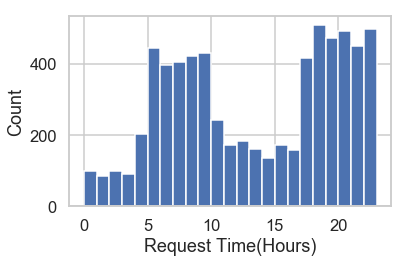

In [253]:
#Plotting a histogram for the request time. This would show the range of time when most of the requests are placed.

uber['Request_hour'].hist(bins = range(0,24,1))
plt.xlabel('Request Time(Hours)')
plt.ylabel('Count')
plt.tight_layout()

From the above plot we can say that the maximum requests for cab is done between <br>
-  5:00AM to 10:00AM
-  6:00PM to 12:00AM

In [254]:
# Creating a cros tavulation between Status and Time_Slot

pd.crosstab(index = uber['Time_slot'], columns = uber['Status'])

Status,Cancelled,No Cars Available,Trip Completed
Time_slot,,,
Afternoon,48,134,298
Early morning,229,214,297
Evening,78,326,344
Forenoon,252,189,404
Late evening,89,895,491
Late night,12,169,102
Morning,492,239,496
Night,64,484,399


In [255]:
# Creating a cros tavulation between Status and Time_Slot

round(100*pd.crosstab(index = uber['Time_slot'], columns = uber['Status'])/len(uber.index),2)

Status,Cancelled,No Cars Available,Trip Completed
Time_slot,,,
Afternoon,0.71,1.99,4.42
Early morning,3.40,3.17,4.40
Evening,1.16,4.83,5.10
Forenoon,3.74,2.80,5.99
Late evening,1.32,13.27,7.28
Late night,0.18,2.51,1.51
Morning,7.29,3.54,7.35
Night,0.95,7.18,5.92


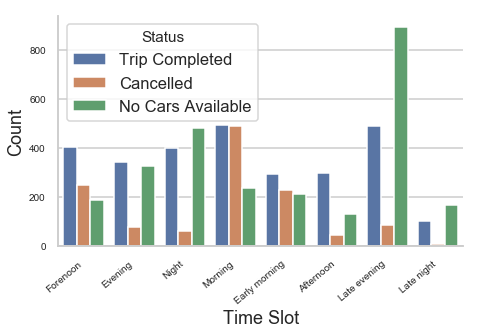

In [256]:
# Plotting total count of trip status for each time slot

plt.figure(figsize = (7,5))
sns.set_style('whitegrid')
p = sns.countplot(x = 'Time_slot', hue = 'Status',data = uber)
p.set_xticklabels(p.get_xticklabels(), rotation = 40, ha = 'right')
p.tick_params(labelsize = 10)
p.set_xlabel('Time Slot')
p.set_ylabel('Count')
sns.despine()
plt.tight_layout()

Based on the above plot  it can be said that:
-  Maximum cars are __not available__ during __late evening__ and the second highest is during __night__.
-  Highest __cancellation__ of trips is during __morning__. Second highest is during __forenoon__. __Rarely__ any trips are cancelled during __late nights__.

Other insights
-  __Trips completed__ during __morning__ is highest and is __almost equal__ to trips completed in __late evening__.

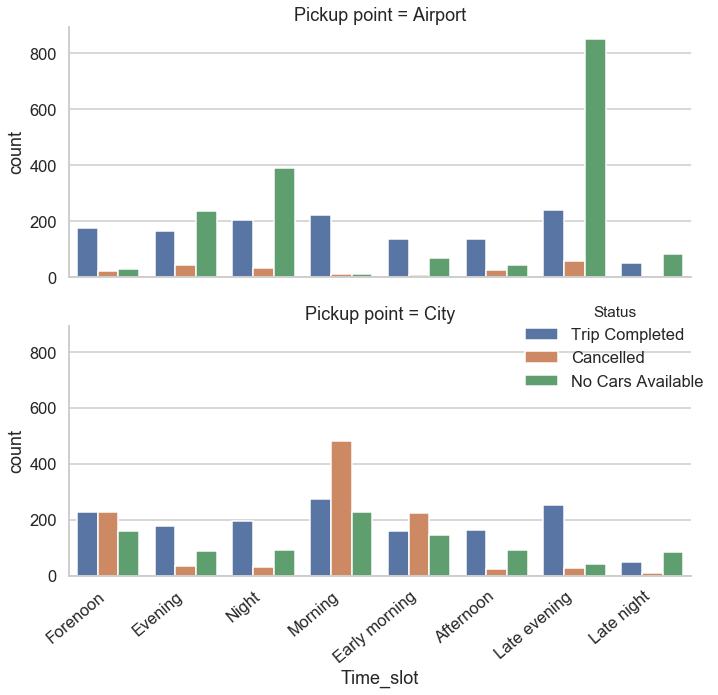

In [257]:
# Plotting total count of trip status for each time slot and pickup point

sns.set_style('whitegrid')
p=sns.catplot(x = 'Time_slot', hue = 'Status',row = 'Pickup point',kind = 'count', data = uber, height = 5, aspect = 1.5)
loc, labels = plt.xticks() #Note for future: 'facetgrid' object has no attribute 'get_xticklabels' for catplot
p.set_xticklabels(labels, rotation = 40, ha = 'right') # Rotating xticklabel
plt.tight_layout()

Based on above plot  it can be said that:
-  When the __pickup point__ is __airport__ __maximum__ cars are __not avaialable__ during __late evening__. Comparatively this number is very __very less__ when the pickup point is __city__.
-  During __night__ __unavaiability__ of cars is more at airport than at city.
-  Highest __cancellation__ of trips is during __morning__ when the __pickup point__ is __city__. Second highest is during __early morning__ and __forenoon__ when the pickup point is __city__. This number is very __very small__ when the __pickup point__ is __airport__. 

Other insights
-  Most of the trips booked at the __airport__ during __early morning__ are __completed__. Rarely any trip is cancelled or cars unavailable.
-  Very few traips are cancelled when the pickup point is airport. Most of the time either cars are unavailable or trips are completed.

In [258]:
uber.head(50)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_time,Request_hour,Request_minute,Drop_date,Drop_time,Drop_hour,Drop_minute,Time_slot,Next_request_timestamp,Wait_time,Wait_time_in_hours,Wait_time_in_minutes
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,51,2016-11-07,13:00:00,13.0,0.0,Forenoon,2016-11-07 17:57:00,04:57:00,4.950000,297.000000
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,57,2016-11-07,18:47:00,18.0,47.0,Evening,NaT,NaT,NaN,NaN
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,17,2016-12-07,09:58:00,9.0,58.0,Forenoon,2016-12-07 21:08:00,11:10:00,11.166667,670.000000
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,8,2016-12-07,22:03:00,22.0,3.0,Night,NaT,NaT,NaN,NaN
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,33,2016-07-13,09:25:47,9.0,25.0,Morning,2016-07-13 21:57:28,12:31:41,12.528056,751.683333
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,57,2016-07-13,22:28:59,22.0,28.0,Night,NaT,NaT,NaN,NaN
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,15,2016-07-14,07:13:15,7.0,13.0,Morning,NaT,NaT,NaN,NaN
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,11,2016-07-15,06:07:52,6.0,7.0,Early morning,2016-07-15 17:57:27,11:49:35,11.826389,709.583333
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,57,2016-07-15,18:50:51,18.0,50.0,Evening,NaT,NaT,NaN,NaN
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,2016-11-07,06:46:00,6,46,2016-11-07,07:25:00,7.0,25.0,Morning,NaT,NaT,NaN,NaN


In [259]:
# Calculation of demand and supply based on time slot
# Demand = Trips Completed + Trips Cancelled + No Cars Available

demand_by_timeslot = uber.groupby(['Time_slot'], as_index = False)['Status'].count().sort_values(by = 'Status')
demand_by_timeslot.rename(columns = {'Status':'Demand'}, inplace = True)

# Supply = Trips Completed

supply_by_timeslot = uber.loc[uber['Status'] == 'Trip Completed'].groupby(['Time_slot'], as_index = False)['Status'].count().sort_values(by = 'Status')
supply_by_timeslot.rename(columns = {'Status':'Supply'}, inplace = True)

In [260]:
# Calculating the gap in demand and supply based on time slot
# Gap = Demand - Supply

demand_supply_by_timeslot = pd.merge(demand_by_timeslot, supply_by_timeslot, how = 'inner', on = 'Time_slot')
demand_supply_by_timeslot['Gap'] = demand_supply_by_timeslot['Demand']-demand_supply_by_timeslot['Supply']
demand_supply_by_timeslot

,Time_slot,Demand,Supply,Gap
0,Late night,283,102,181
1,Afternoon,480,298,182
2,Early morning,740,297,443
3,Evening,748,344,404
4,Forenoon,845,404,441
5,Night,947,399,548
6,Morning,1227,496,731
7,Late evening,1475,491,984


In [261]:
# Writing data frame to csv

demand_supply_by_timeslot.to_csv('demand_supply_by_timeslot.csv',sep = ',', encoding = 'utf-8', index = False)

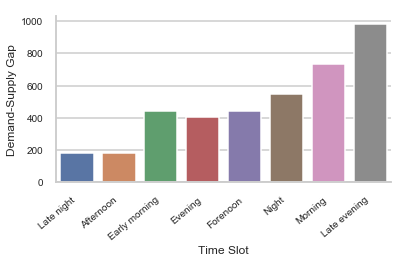

In [262]:
# Plotting the supply demand gap based on time slot

sns.set_style('whitegrid')
p = sns.barplot(x = 'Time_slot', y = 'Gap', data = demand_supply_by_timeslot)
p.set_xticklabels(p.get_xticklabels(), rotation = 40, ha = 'right')
p.tick_params(labelsize = 10)
p.set_xlabel('Time Slot', fontsize = 12)
p.set_ylabel('Demand-Supply Gap', fontsize = 12)
sns.despine()
plt.tight_layout()

Based on the above plot it can be said that:
-  The __highest gap__ is during the __late evening__ followed by morning and night.

In [263]:
# Calculation of demand and supply based on pickup point
# Demand = Trips Completed + Trips Cancelled + No Cars Available

demand_by_pickup = uber.groupby(['Pickup point'], as_index = False)['Status'].count().sort_values('Status')
demand_by_pickup.rename(columns = {'Status':'Demand'}, inplace = True)

# Supply = Trips Completed

supply_by_pickup = uber.loc[uber['Status'] == 'Trip Completed'].groupby(['Pickup point'], as_index = False)['Status'].count().sort_values('Status')
supply_by_pickup.rename(columns = {'Status':'Supply'}, inplace = True)

# Calculating the gap in demand and supply based on pickup point
# Gap = Demand - Supply

demand_supply_by_pickup = pd.merge(demand_by_pickup, supply_by_pickup, how = 'inner', on = 'Pickup point')
demand_supply_by_pickup['Gap'] = demand_supply_by_pickup['Demand']-demand_supply_by_pickup['Supply']
demand_supply_by_pickup

,Pickup point,Demand,Supply,Gap
0,Airport,3238,1327,1911
1,City,3507,1504,2003


In [264]:
# Writing data frame to csv

demand_supply_by_pickup.to_csv('demand_supply_by_pickup.csv',sep = ',', encoding = 'utf-8', index = False)

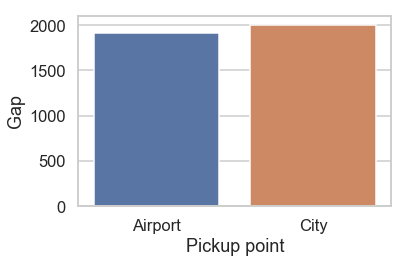

In [265]:
# Plotting the supply demand gap based on pickup point

sns.barplot(x = 'Pickup point', y = 'Gap', data = demand_supply_by_pickup)
plt.tight_layout()

Based on the above plot we cannot put forward any insights for gap gap in supply and demand

In [266]:
# Calculation of demand and supply based on pickup point and time slot
# Demand = Trips Completed + Trips Cancelled + No Cars Available

demand = uber.groupby(['Pickup point','Time_slot'], as_index = False)['Status'].count().sort_values('Status')
demand.rename(columns = {'Status':'Demand'}, inplace = True)

# Supply = Trips Completed

supply = uber.loc[uber['Status'] == 'Trip Completed'].groupby(['Pickup point','Time_slot'], as_index = False)['Status'].count().sort_values('Status')
supply.rename(columns = {'Status':'Supply'}, inplace = True)

In [267]:
# Calculating the gap in demand and supply based on pickup point and time slot
# Gap = Demand - Supply

demand_supply = pd.merge(demand, supply, how = 'inner', on = ['Pickup point','Time_slot'])
demand_supply['Gap'] = demand_supply['Demand']-demand_supply['Supply']
demand_supply

,Pickup point,Time_slot,Demand,Supply,Gap
0,Airport,Late night,136,52,84
1,City,Late night,147,50,97
2,Airport,Afternoon,202,135,67
3,Airport,Early morning,209,136,73
4,Airport,Forenoon,228,176,52
5,Airport,Morning,245,223,22
6,City,Afternoon,278,163,115
7,City,Evening,303,180,123
8,City,Night,323,196,127
9,City,Late evening,326,253,73


In [268]:
# Writing data frame to csv

demand_supply.to_csv('demand_supply.csv',sep = ',', encoding = 'utf-8', index = False)

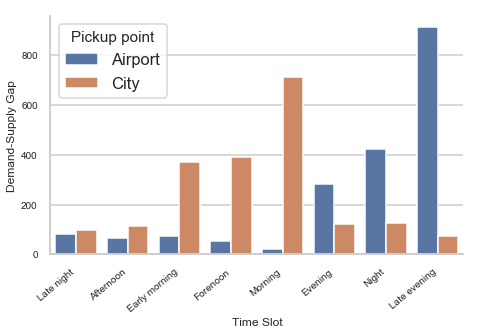

In [269]:
# Plotting the supply demand gap based on pickup point and time slot

plt.figure(figsize = (7,5))
sns.set_style('whitegrid')
p = sns.barplot(x = 'Time_slot', y = 'Gap', hue = 'Pickup point', data = demand_supply)
p.set_xticklabels(p.get_xticklabels(), rotation = 40, ha = 'right')
p.tick_params(labelsize = 10)
p.set_xlabel('Time Slot', fontsize = 12)
p.set_ylabel('Demand-Supply Gap', fontsize = 12)
sns.despine()
plt.tight_layout()

Based on the above plots it can be said that:
-  When the __pickup point__ is __airport__, the highest gap is during __late evening__ followed  by night and evening.
-  When the __pickup point__ is __city__, the highest gap is during __morning__, followed by forenoon and early morning.

In [271]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_time,Request_hour,Request_minute,Drop_date,Drop_time,Drop_hour,Drop_minute,Time_slot,Next_request_timestamp,Wait_time,Wait_time_in_hours,Wait_time_in_minutes
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,51,2016-11-07,13:00:00,13.0,0.0,Forenoon,2016-11-07 17:57:00,04:57:00,4.950000,297.000000
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,57,2016-11-07,18:47:00,18.0,47.0,Evening,NaT,NaT,NaN,NaN
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,17,2016-12-07,09:58:00,9.0,58.0,Forenoon,2016-12-07 21:08:00,11:10:00,11.166667,670.000000
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,8,2016-12-07,22:03:00,22.0,3.0,Night,NaT,NaT,NaN,NaN
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,33,2016-07-13,09:25:47,9.0,25.0,Morning,2016-07-13 21:57:28,12:31:41,12.528056,751.683333


In [272]:
uber['Wait_time'].describe()

count                      1470
mean     0 days 05:59:02.406122
std      0 days 04:04:49.332416
min             0 days 00:02:00
25%      0 days 02:41:27.750000
50%             0 days 05:08:43
75%      0 days 08:46:47.250000
max             0 days 20:05:00
Name: Wait_time, dtype: object

-  25% of the drivers wait of 3 hours 41 minutes before new ride request comes
-  Median wait time is 6 hours 35 minutes
-  Very high wait time can also mean that the drive is taking off the record rides.

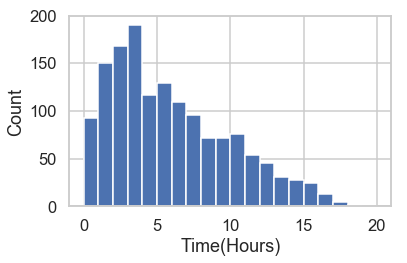

In [273]:
#Plotting a histogram for the wait time of drivers

uber['Wait_time_in_hours'].hist(bins = range(0,21,1))
plt.xlabel('Time(Hours)')
plt.ylabel('Count')
plt.tight_layout()

Based on the above plot it can be said that
-  Most of the drivers have to wait for atleast 3-4 hours befor they get a new ride.

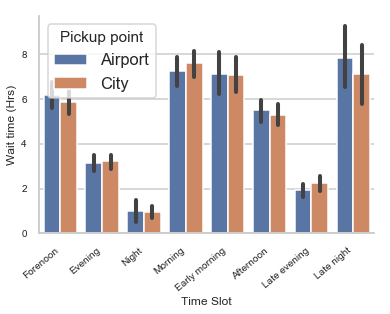

In [274]:
# Plotting barplot with wait time of drivers on y-axis, time slot on x-axis and pickup points differentiated by colour

sns.set_style('whitegrid')
p = sns.barplot(x = 'Time_slot', y = 'Wait_time_in_hours', hue = 'Pickup point', data = uber)
p.set_xticklabels(p.get_xticklabels(), rotation = 40, ha = 'right')
p.tick_params(labelsize = 10)
p.set_xlabel('Time Slot', fontsize = 12)
p.set_ylabel('Wait time (Hrs)', fontsize = 12)
sns.despine()
#plt.tight_layout()

Based on the above plot we can say that:
-  The wait time is minimum during night when the pickup point is either city or airport followed by late evening. The wait time is less than or equal to 2 hours.
-  Second minimum wait time is during evening which is around 3 hours for both the pickup points.
- Highest wait times for the drivers is during morning, early morning and late night